
In this example, we will train a neural network using sinnn on the mnist digits dataset


In [30]:
!pip install sinnn

In [31]:
import tensorflow.keras.datasets.mnist as mnist
import numpy as np
from sinnn.Model import Model
from sinnn.Layers import Dense, ReLU
from sinnn.Losses import CrossEntropy
from sinnn.utils import save_model, load_model

Loading the dataset

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

The flatten function is udes to flatten a 2d image into 1d representation. 

In [33]:
def flatten(array):
    flat = []
    for i in range(len(array)):
        flat.append(array[i].flatten())
    return np.array(flat)

x_train_flat, x_test_flat = flatten(x_train), flatten(x_test)

Display some images at random from the training set along with their labels.

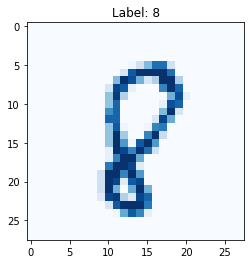

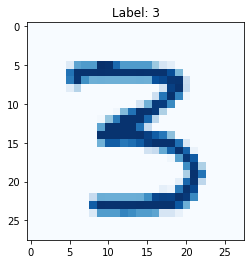

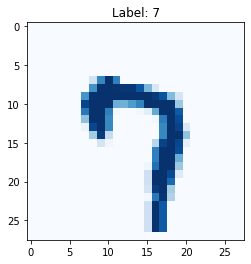

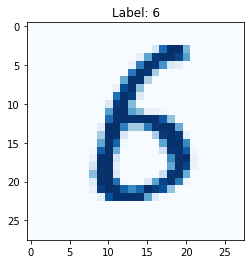

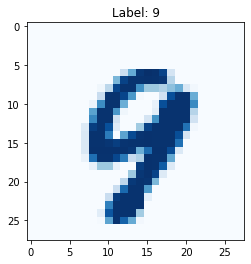

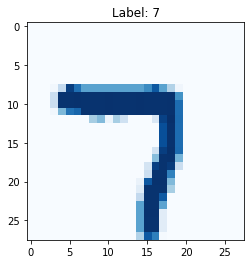

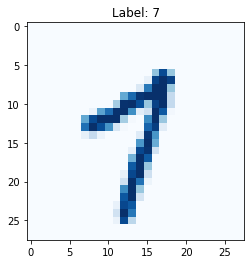

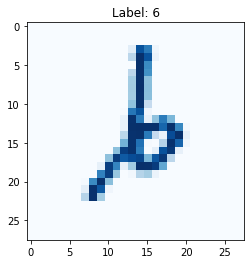

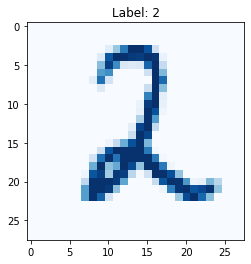

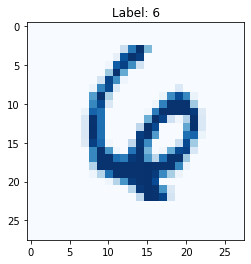

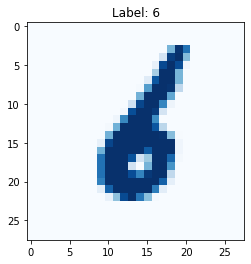

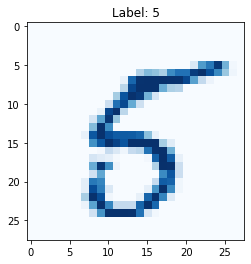

In [34]:
for i in np.random.randint(len(x_train), size=12):
    plt.title("Label: %i" % y_train[i])
    plt.imshow(x_train[i], cmap='Blues')
    plt.show()

A model object in intantiated and trained with CrossEntropy loss_function. We add a neural network with 100 neurons in the first hidden layer, followed by ReLU, followed by 200 neurons in second hidden layer, again followed by ReLu. The output layer contains 10 neurons each corresponding to a label. The activation of the output layer will predict labels.

In [35]:
model = Model(loss_function=CrossEntropy())
model.add(Dense(100), ReLU(), Dense(200), ReLU(), Dense(10))
model.train(x_train_flat, y_train, 32, 10, (x_test_flat, y_test), metrics=("loss", "accuracy"))

{'Epochs': 0, 'train_loss': 2.327499879611317, 'validation_loss': 2.32834553756797, 'train_accuracy': 0.10023333333333333, 'validation_accuracy': 0.1034}
{'Epochs': 1, 'train_loss': 0.13742208989431587, 'validation_loss': 0.15405078140559098, 'train_accuracy': 0.9575, 'validation_accuracy': 0.9529}
{'Epochs': 2, 'train_loss': 0.0902191965792777, 'validation_loss': 0.11845338411072721, 'train_accuracy': 0.9724666666666667, 'validation_accuracy': 0.9643}
{'Epochs': 3, 'train_loss': 0.07056076203364373, 'validation_loss': 0.10927901269074025, 'train_accuracy': 0.97845, 'validation_accuracy': 0.9666}
{'Epochs': 4, 'train_loss': 0.057076953228899524, 'validation_loss': 0.1043093214094062, 'train_accuracy': 0.9825166666666667, 'validation_accuracy': 0.9679}
{'Epochs': 5, 'train_loss': 0.04607063623189347, 'validation_loss': 0.10051429649378738, 'train_accuracy': 0.9858333333333333, 'validation_accuracy': 0.97}
{'Epochs': 6, 'train_loss': 0.04040050494743541, 'validation_loss': 0.102408040698

After training the model we save the model immediately to prevent loss of data.

In [36]:
save_model(model)

Model is loaded and all metrics plotted.

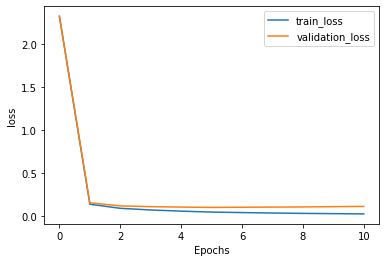

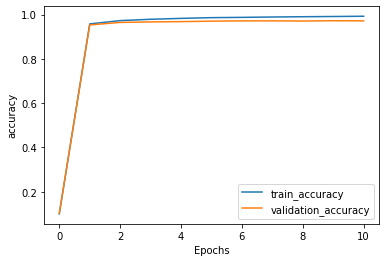

In [37]:
import matplotlib.pyplot as plt
model = load_model()
for metric in model.train_log:
    for key in model.train_log[metric]:
        plt.plot(model.train_log[metric][key], label=key)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()